## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load the IRIS dataset
iris = load_iris()
# Create dataframe using iris.data
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_data['class'] = iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Visualization

<Figure size 900x600 with 0 Axes>

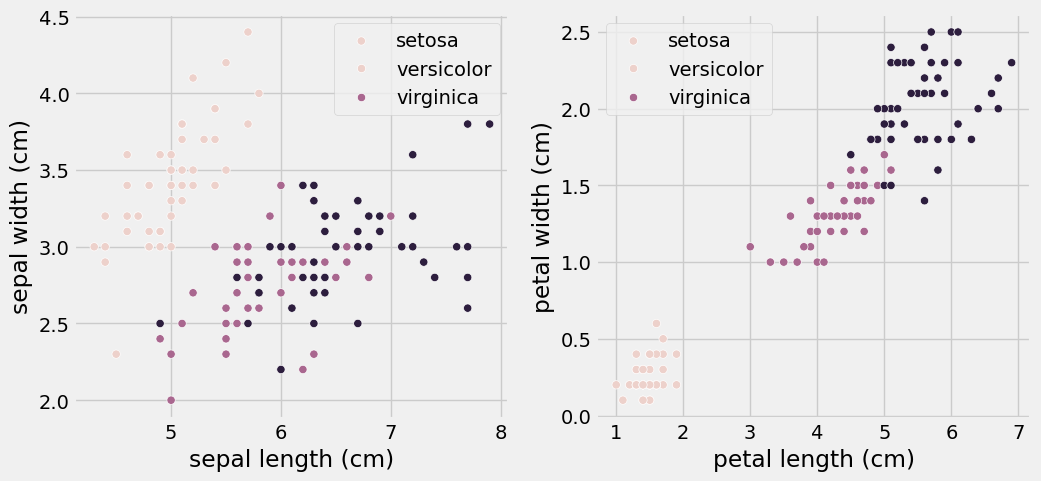

In [3]:
plt.figure(figsize=(9,6))
plt.style.use('fivethirtyeight')
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11, 5))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue=iris.target, data=iris_data, ax=ax1)
ax1.legend(labels=['setosa', 'versicolor', 'virginica'])
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue=iris.target, data=iris_data, ax=ax2)
ax2.legend(labels=['setosa', 'versicolor', 'virginica'])

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Training set and Testing Set

In [5]:
X = iris.data # Features (150, 4)
y = iris.target # Targets or labels (150,)

# Spliting data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)
print(f"X_train: {X_train.size}")
print(f"y_train: {y_train.size}")
print(f"X_test: {X_test.size}")
print(f"y_test: {y_test.size}")

X_train: 480
y_train: 120
X_test: 120
y_test: 30


## Fitting and Evaluating the model

In [6]:
KNN_classifier = KNeighborsClassifier(n_neighbors=3)
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
y_pred = KNN_classifier.predict(X_test)

## Confusion matrix and classification report

<Axes: >

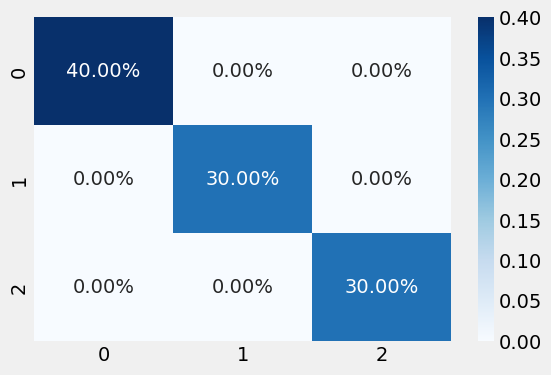

In [8]:
conf_m = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_m/np.sum(conf_m), annot=True, fmt='.2%', cmap='Blues')

In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Finding best K-values

In [10]:
error_rate = []
for i in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean(y_pred != y_test))
    

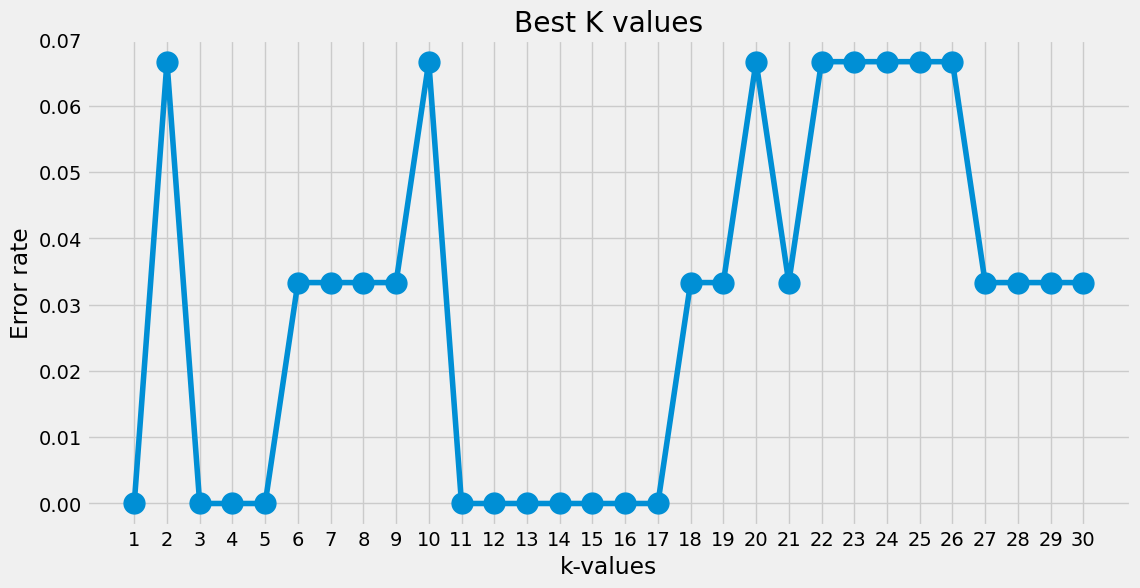

In [11]:
plt.figure(figsize=(12,6))
plt.plot(range(1,31), error_rate, marker='o', markersize=15)
plt.title('Best K values')
plt.xlabel('k-values')
plt.ylabel('Error rate')
plt.xticks(range(1,31))
plt.show()
